In [236]:
# lets make all the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
pd.set_option("max_columns",500)
pd.set_option("max_rows",500)

In [466]:
#load the dataset
df=pd.read_csv("/Users/apple/Downloads/train.csv")

# 1. Data Inspection & Walkthrough

In [467]:
#lets check the shape of the data
df.shape

(1460, 81)

In [468]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [469]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [470]:
#lets check the missing percentage of values inside the columns
pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2),columns=['Missing%'])

,Missing%
Id,0.00
MSSubClass,0.00
MSZoning,0.00
LotFrontage,17.74
LotArea,0.00
Street,0.00
Alley,93.77
LotShape,0.00
LandContour,0.00
Utilities,0.00


#### Lets drop all the columns with missing value more than 10%

In [471]:
# getting all the column names with more than 10% missing values
temp_df=pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2),columns=['Missing%'])
missing_cols=temp_df[temp_df['Missing%']>10]
print(missing_cols.index)

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [472]:
# dropping the columns
df.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],axis=1,inplace=True)

In [473]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))
    print("********")

1460    0.000685
479     0.000685
481     0.000685
482     0.000685
483     0.000685
          ...   
976     0.000685
977     0.000685
978     0.000685
979     0.000685
1       0.000685
Name: Id, Length: 1460, dtype: float64
********
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
********
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
********
7200     0.017123
9600     0.016438
6000     0.011644
10800    0.009589
9000     0.009589
           ...   
7094     0.000685
6130     0.000685
9337     0.000685
5232     0.000685
8190     0.000685
Name: LotArea, Length: 1073, dtype: float64
********
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
********
Reg    0.633562
IR1   

#### <u>observation</u> : the columns streets and utilities have the lowest variance .

In [474]:
# lets drop these columns as well
cols_to_drop=['Street','Utilities','Electrical']

df.drop(cols_to_drop,axis=1,inplace=True)

In [475]:
# dealing with the year column
year_cols=["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"]
df[year_cols].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,1460.000000,1460.000000,1379.000000,1460.000000
mean,1971.267808,1984.865753,1978.506164,2007.815753
std,30.202904,20.645407,24.689725,1.328095
min,1872.000000,1950.000000,1900.000000,2006.000000
25%,1954.000000,1967.000000,1961.000000,2007.000000
50%,1973.000000,1994.000000,1980.000000,2008.000000
75%,2000.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


#### <u>Observation</u> : We can see that the maximum value for every year is 2010 , so we can convert these values to number of years . For example if the value in column is like 2006 , we cann convert it as 2010 - 2006 =4 years .

In [476]:
#converting year to number of years till 2010 , and replacing the original columns
for col in year_cols:
    df[col]=df[col].apply(lambda x: 2010 - x)

In [477]:
df[year_cols].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,7,7,7.0,2
1,34,34,34.0,3
2,9,8,9.0,2
3,95,40,12.0,4
4,10,10,10.0,2


In [478]:
#missing value imputation
temp_df=pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['%missing'])
print(temp_df[temp_df['%missing']>0].index)

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


In [479]:
# replacing the missing values with the appropriate value from the  variable dictionary
df['MasVnrType'].fillna("NA",inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)
df['BsmtQual'].fillna("NA",inplace=True)
df['BsmtCond'].fillna("NA",inplace=True)
df['BsmtExposure'].fillna("NA",inplace=True)
df['BsmtFinType1'].fillna("NA",inplace=True)
df['BsmtFinType2'].fillna("NA",inplace=True)
df['GarageType'].fillna("NA",inplace=True)
df['GarageYrBlt'].fillna(-1,inplace=True)
df['GarageFinish'].fillna("NA",inplace=True)
df['GarageQual'].fillna("NA",inplace=True)
df['GarageCond'].fillna("NA",inplace=True)


In [480]:
#checking if there are any more missing values
round((df.isna().sum()/df.shape[0])*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr 

In [481]:
# dropping the Id column
df.drop("Id",inplace=True,axis=1)

In [482]:
df.shape

(1460, 71)

#### <u> observation </u> : So we have dropped around 10 columns during inspection , lets move ahead to the EDA part

# 2 . EDA

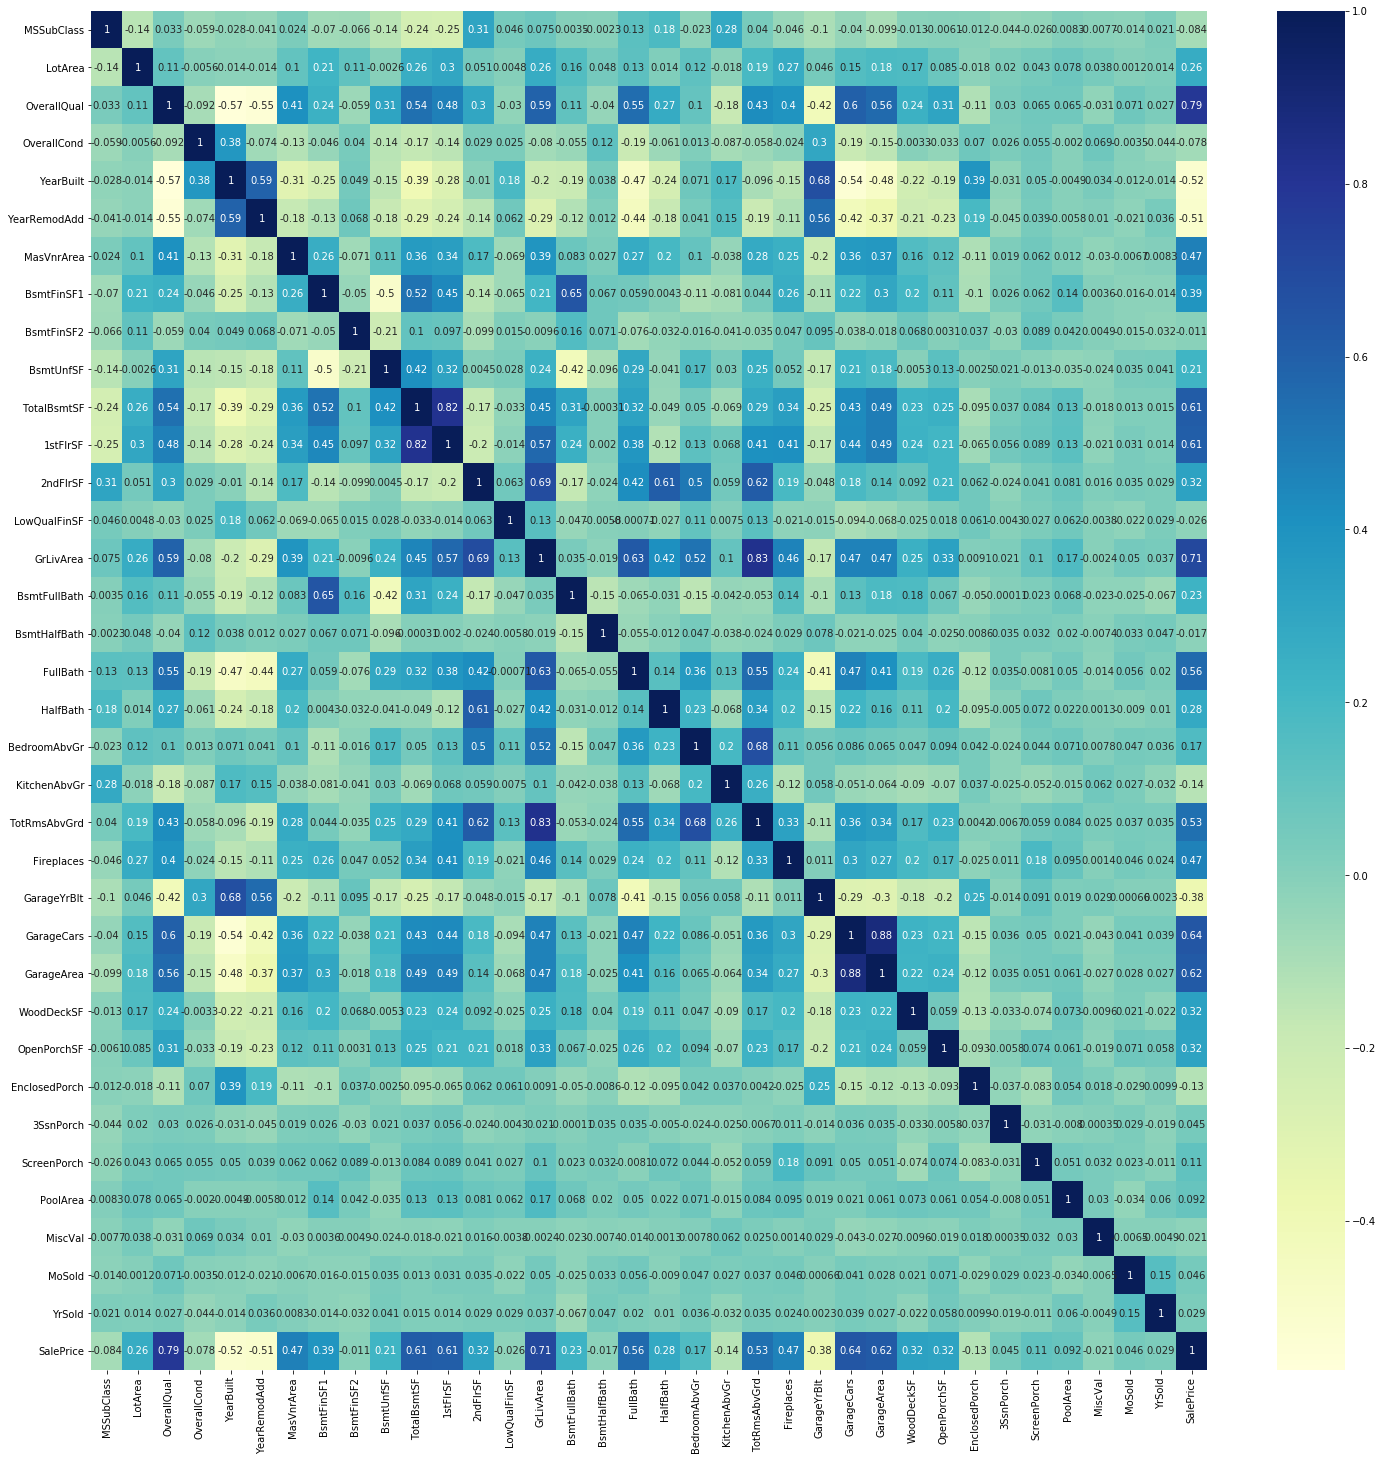

In [254]:
# lets start with the heatmap for numeric cols
numeric_cols=list(df.dtypes[df.dtypes!='object'].index)
plt.figure(figsize=(25,25))
sns.heatmap(df[numeric_cols].corr() ,  annot=True ,cmap="YlGnBu")
plt.show()

#### <u> Observation </u> -
#### 1 . SalesPrice have strong positive correlation with OverallQual , GrLivArea , GarageCars , GarageArea
#### 2 . SalesPrie have strong negative correlation wtih YearBuilt , YearRemodAdd

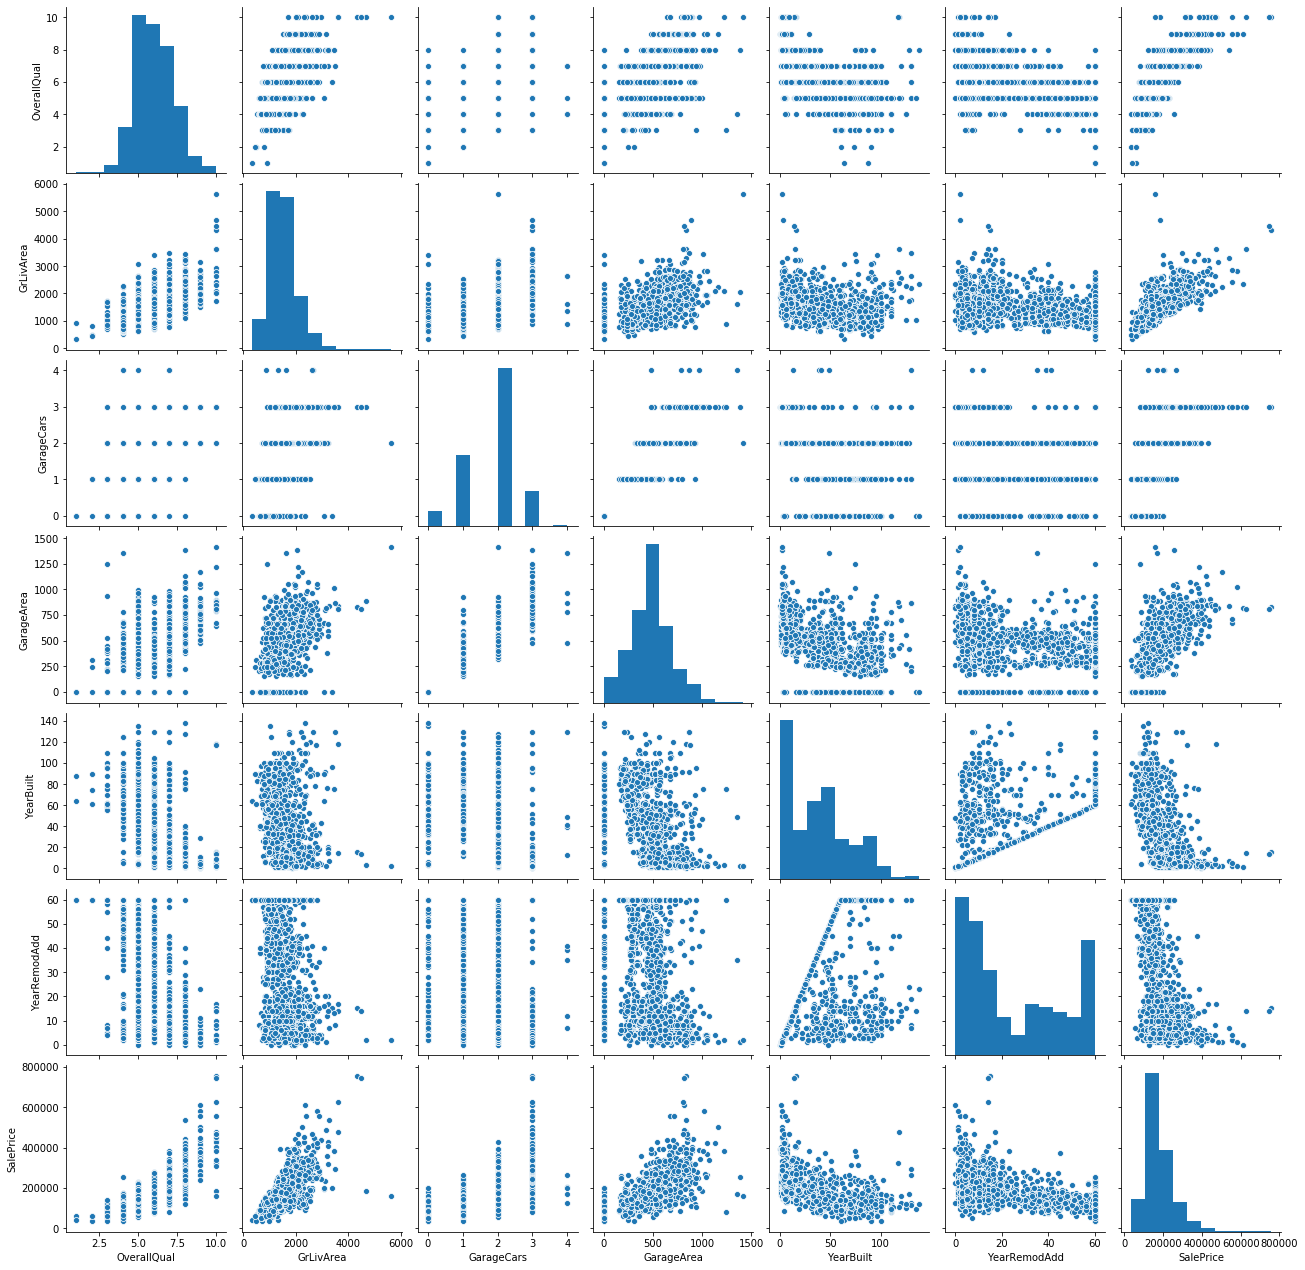

In [255]:
observation_Columns= ["OverallQual" , "GrLivArea" , "GarageCars" , "GarageArea" ,"YearBuilt" , "YearRemodAdd"
                      , "SalePrice"]
sns.pairplot(df[observation_Columns])

In [256]:
df.shape

(1460, 71)

In [257]:
# from the scatter plots we can see that there are outliers in the data , lets try to drop these outliers
def remove_outliers(df):
    for col in numeric_cols:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.99)
        IQR = Q3-Q1
        df =  df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 
    return df 

df=remove_outliers(df)

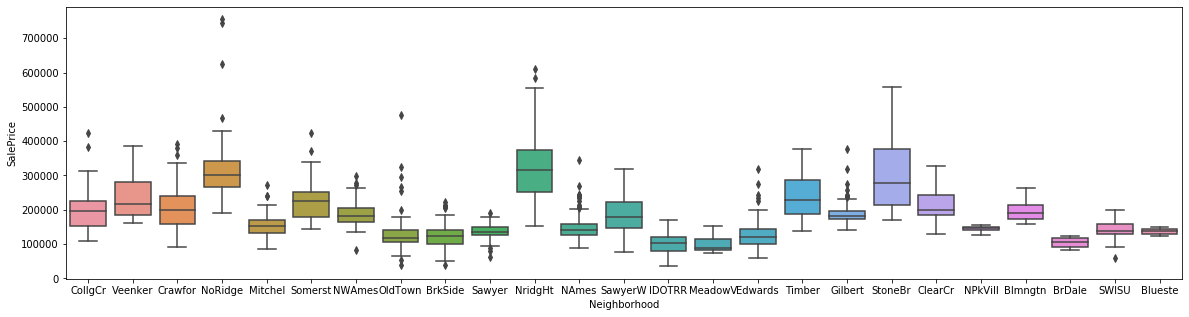

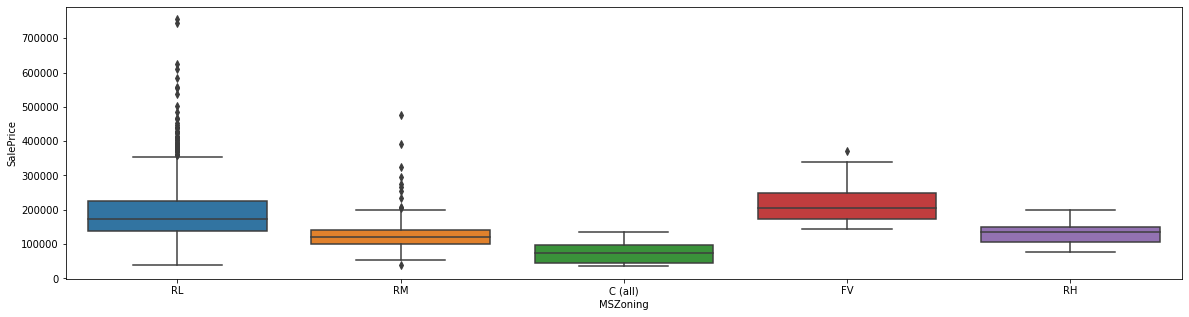

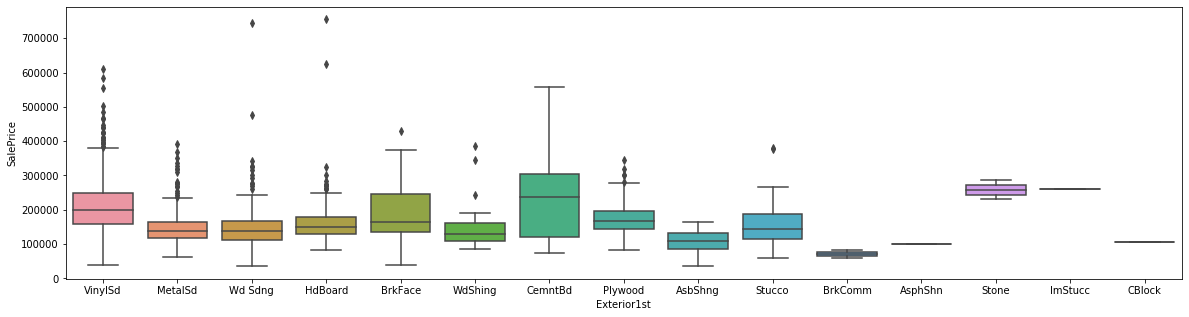

In [495]:
# saleprice vs categorical columns
cat_cols = ['Neighborhood','MSZoning','Exterior1st']
for col in cat_cols:
    plt.figure(figsize=(20,5))
    sns.boxplot(y='SalePrice', x=col,data=df)
    plt.show()

# 3 . Data Preparation

In [259]:
# after carefully studying the data set  , we can divide categorical columns into 2 types 

# ordinal categorical columns :
ord_cat_cols=['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']

# nominal cat cols :
nom_cat_cols = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Functional','GarageType','PavedDrive','SaleType','SaleCondition']

In [260]:
# manual label encoding ordinal columns :
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

In [261]:
# dummy encoding the nominal columns
dummy_cols = pd.get_dummies(df[nom_cat_cols],drop_first=True)
df=pd.concat([df,dummy_cols],axis=1)
df.drop(nom_cat_cols,axis=1 ,inplace=True)

In [328]:
# lets check the shape of the dataframe
df.shape

(1440, 192)

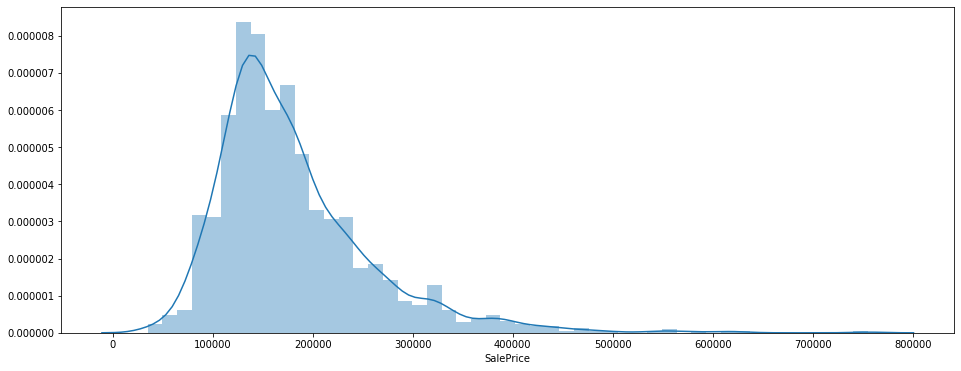

In [263]:
# lets check the distribution of target variable
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

#### <u>observation:</u>  As we can see that it is not quite a normal distribution ,  lets confirm it further with the help of Q-Q plot .

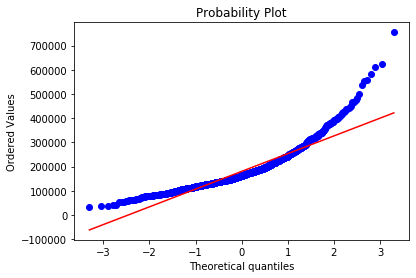

In [264]:
# making a Q - Q plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

#### <u>observation:</u> : It is confirmed that. , the target variable does not follows normal distribution , so we should transform it using log transformation .

In [266]:
# transforming the target variable , using log transform
df["SalePrice"] = np.log1p(df["SalePrice"])

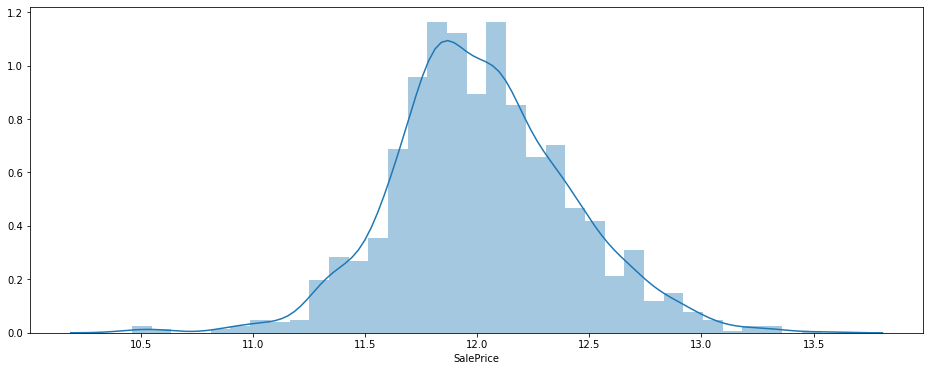

In [267]:
# checking for normal distribution
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

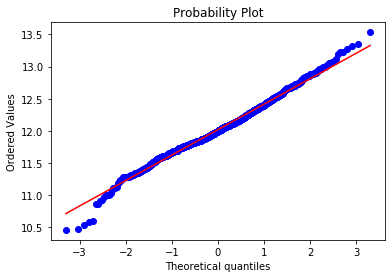

In [268]:
# checking for normal distribution , using Q-Q plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [269]:
# test - train split
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)


In [270]:
# performing scaling
scaler= StandardScaler()
df_train[numeric_cols]=scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols]=scaler.transform(df_test[numeric_cols])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

In [271]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [272]:
len(X_train.columns)

191

# 4 . Model building & Evaluation

In [273]:
# creating a linear Regression model and passing it to RFE for feature selection .
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=70, step=1, verbose=0)

In [275]:
#rfe DF
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=['Features','Status','Rank'])

In [276]:
# getting all the features , deemed important by RFE
feature_list=rfe_scores[rfe_scores['Status']==True]['Features'].values

In [277]:
# subsetting from the original dataframe
X_train=X_train[feature_list]
X_test=X_test[feature_list]

## 4.1 Lasso Regression

In [332]:
# lasso regression with aplha (Lambda) as 0.001
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print("R square2 on train {}".format(r2_score(y_true=y_train,y_pred=y_train_pred)))

y_test_pred  = lm.predict(X_test)
print("R square2 on test {}".format(r2_score(y_true=y_test,y_pred=y_test_pred)))

R square2 on train 0.9047312684293795
R square2 on test 0.8596948807475051


In [280]:
# checking the intercept
lm.intercept_

-0.851788522538362

In [333]:
# coeff_list = list(lm.coef_)
# coeff_list = [round(x,3) for x in coeff_list]
# col = df_train.columns
# list(zip(col,coeff_list))

[('MSSubClass', 0.296),
 ('LotArea', -0.173),
 ('LotShape', 0.125),
 ('LandSlope', 0.032),
 ('OverallQual', -0.0),
 ('OverallCond', 0.085),
 ('YearBuilt', 0.246),
 ('YearRemodAdd', 0.005),
 ('MasVnrArea', 0.0),
 ('ExterQual', -0.008),
 ('ExterCond', 0.411),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.609),
 ('BsmtExposure', 0.371),
 ('BsmtFinType1', 0.518),
 ('BsmtFinSF1', 0.359),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', -0.138),
 ('TotalBsmtSF', 0.401),
 ('HeatingQC', -0.125),
 ('CentralAir', -0.05),
 ('1stFlrSF', 0.213),
 ('2ndFlrSF', 0.066),
 ('LowQualFinSF', 0.187),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.0),
 ('HalfBath', -3.442),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.257),
 ('KitchenQual', -0.295),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.075),
 ('GarageYrBlt', 0.033),
 ('GarageFinish', -0.058),
 ('GarageCars', -0.0),
 ('GarageArea', -0.118),
 ('GarageQual', -0.0),
 ('GarageCond', 0.0),
 ('WoodDeckSF', -0.696),

#### making 10 folds , with 6 values of alpha  , hence creating 60 models

In [451]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0]}
model = Lasso()
model_cv = GridSearchCV(estimator = model,param_grid=hyper_param,scoring='r2',cv=folds,verbose=1,return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [452]:
# lets create a dataframe and look at the cross validation results
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.024455,0.002611,0.001576,0.000310,0.001,{'alpha': 0.001},0.916475,0.588408,0.895641,0.923571,0.899125,0.867849,0.877206,0.880988,0.893654,0.890882,0.863380,0.093040,1,0.904849,0.907243,0.905998,0.904251,0.905708,0.909741,0.907142,0.907564,0.904197,0.904170,0.906086,0.001740
1,0.005262,0.000928,0.001318,0.000254,0.010,{'alpha': 0.01},0.882575,0.545865,0.873439,0.906026,0.873960,0.837433,0.868826,0.874222,0.859217,0.855366,0.837693,0.098752,2,0.854138,0.878175,0.852370,0.851511,0.852382,0.856465,0.855793,0.854845,0.855041,0.855126,0.856584,0.007358
2,0.003439,0.000399,0.001153,0.000150,0.100,{'alpha': 0.1},0.827367,0.596503,0.831305,0.875641,0.812620,0.797659,0.809765,0.847833,0.800394,0.807264,0.800635,0.071735,3,0.811797,0.836334,0.807881,0.807617,0.805214,0.813982,0.809401,0.809377,0.809340,0.809604,0.812055,0.008395
3,0.002965,0.000198,0.001156,0.000106,1.000,{'alpha': 1.0},-0.016276,-0.000766,-0.000004,-0.025911,-0.000885,-0.000051,-0.000128,-0.002279,-0.000300,-0.021864,-0.006847,0.009758,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002978,0.000359,0.001264,0.000220,5.000,{'alpha': 5.0},-0.016276,-0.000766,-0.000004,-0.025911,-0.000885,-0.000051,-0.000128,-0.002279,-0.000300,-0.021864,-0.006847,0.009758,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


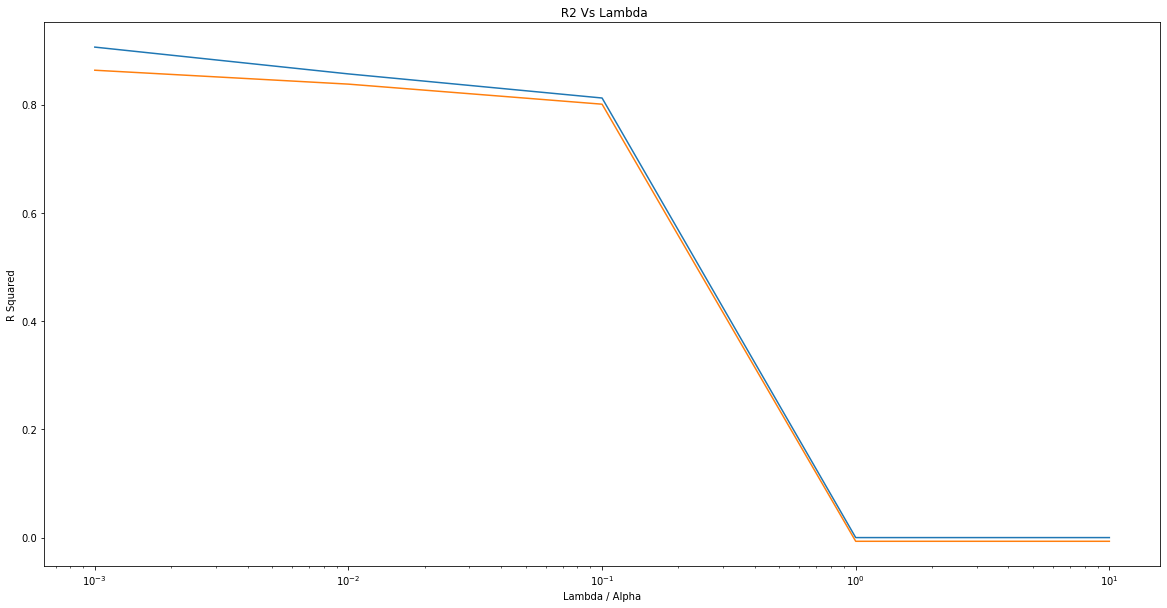

In [454]:
plt.figure(figsize=(20,10))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R Squared')
plt.xlabel('Lambda / Alpha')
plt.title(" R2 Vs Lambda")
plt.show()

In [450]:
#lets look at the best hyper parameter value 
model_cv.best_params_

{'alpha': 0.001}

In [394]:
# fitting the model for the best hyper param value

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("R2 score for train {}".format(r2_score(y_true=y_train,y_pred=y_train_pred)))
print("R2 score for test {}".format(r2_score(y_true=y_test,y_pred=y_test_pred)))

R2 score for train 0.9047312684293795
R2 score for test 0.8596948807475051


In [427]:
# creating coefficient dataframe
model_param = list(lasso.coef_)
cols = X_train.columns
lasso_coef = pd.DataFrame(list(zip(cols,model_param)),columns=['Features','Coefficients'])
lasso_coef['coeff_magnitude']=lasso_coef['Coefficients'].apply(lambda x: abs(x))

In [428]:
# top 5 coeffiecients that have a positve impact on saleprice
lasso_coef.sort_values(by='coeff_magnitude',ascending=False).head(10)

,Features,Coefficients,coeff_magnitude
29,Condition2_PosN,-3.442311,3.442311
41,Exterior1st_BrkComm,-0.695765,0.695765
12,MSZoning_FV,0.608717,0.608717
14,MSZoning_RL,0.517696,0.517696
54,Heating_Grav,-0.498270,0.498270
10,GrLivArea,0.411191,0.411191
19,Neighborhood_Crawfor,0.400793,0.400793
13,MSZoning_RH,0.370933,0.370933
15,MSZoning_RM,0.358533,0.358533
57,Functional_Maj2,-0.323370,0.323370


#### <u>Observation</u> : Variables 'Condition2_PosN', 'Exterior1st_BrkComm', 'MSZoning_FV','MSZoning_RL', 'Heating_Grav' play a crucial role in predicting SalePrice .

## 4.2 Ridge Regression

In [412]:
# now lets use ridge regression
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print("r2 score on train {}".format(r2_score(y_train,y_train_pred)))
y_test_pred = ridge.predict(X_test)
print("r2 score on test  {}".format(r2_score(y_test,y_test_pred)))

r2 score on train 0.9190472848330593
r2 score on test  0.8198977028619409


#### Applying 10 fold cv , with 7 hyper param values , hence fitting 70 models

In [413]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)
hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0]}
model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=hyper_param,scoring='r2',cv=folds,verbose=1,return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [414]:
# creating cross validation results dataframe
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003565,0.000364,0.001422,0.000229,0.001,{'alpha': 0.001},0.910543,0.646594,0.897234,0.915954,0.896097,0.859314,0.892152,0.898139,0.912029,0.909325,0.873738,0.077239,3,0.919064,0.918108,0.919546,0.918364,0.920834,0.924077,0.920269,0.920226,0.918603,0.918497,0.919759,0.001685
1,0.003944,0.001265,0.001558,0.000303,0.010,{'alpha': 0.01},0.910931,0.645926,0.897278,0.916241,0.896432,0.859693,0.891929,0.898006,0.911980,0.909310,0.873773,0.077461,2,0.919060,0.918106,0.919541,0.918360,0.920830,0.924073,0.920265,0.920222,0.918599,0.918493,0.919755,0.001685
2,0.003123,0.000404,0.001331,0.000263,0.100,{'alpha': 0.1},0.913843,0.639448,0.897520,0.918674,0.898696,0.862809,0.889637,0.896682,0.911413,0.909074,0.873780,0.079545,1,0.918713,0.917959,0.919193,0.918027,0.920463,0.923719,0.919925,0.919905,0.918272,0.918166,0.919434,0.001661
3,0.003729,0.000584,0.001494,0.000368,0.200,{'alpha': 0.2},0.915785,0.633357,0.897554,0.920662,0.899889,0.865251,0.887244,0.895318,0.910687,0.908662,0.873441,0.081430,4,0.917923,0.917641,0.918402,0.917252,0.919627,0.922902,0.919168,0.919177,0.917513,0.917404,0.918701,0.001611
4,0.003337,0.001008,0.001340,0.000358,0.500,{'alpha': 0.5},0.918163,0.621129,0.897261,0.924135,0.900547,0.869230,0.881740,0.892088,0.908398,0.906996,0.871969,0.085026,5,0.914723,0.916399,0.915219,0.914046,0.916249,0.919552,0.916179,0.916180,0.914400,0.914251,0.915720,0.001543


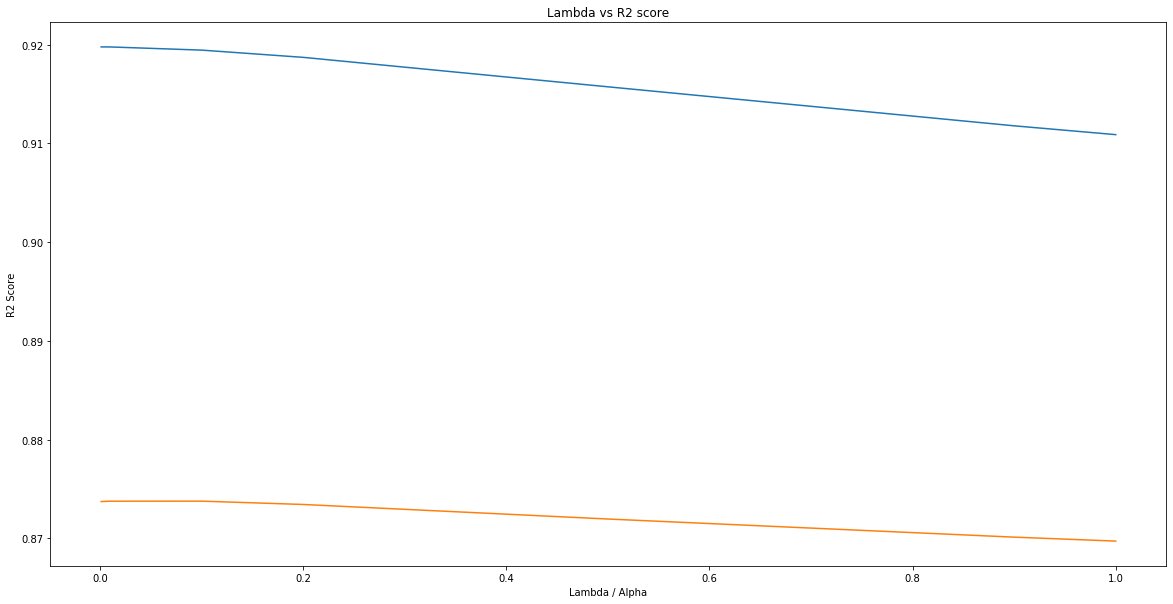

In [415]:
plt.figure(figsize=(20,10))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Lambda / Alpha')
plt.ylabel('R2 Score')
plt.title("Lambda vs R2 score")
plt.show()

In [416]:
# best hyperparameter setting
model_cv.best_params_

{'alpha': 0.1}

In [417]:
# fitting the model with the best hyperparameter
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print("r2 on train set {}".format(r2_score(y_train,y_pred_train)))

y_pred_test = ridge.predict(X_test)
print("r2 on test set {}".format(r2_score(y_test,y_pred_test)))

r2 on train set 0.9187560335352144
r2 on test set 0.8309845309028174


In [418]:
model_parameter = list(ridge.coef_)
cols = X_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef['coeff_magnitude']=ridge_coef['Coef'].apply(lambda x: abs(x))

In [419]:
ridge_coef.sort_values(by='coeff_magnitude',ascending=False).head(10)

,Feaure,Coef,coeff_magnitude
29,Condition2_PosN,-3.709255,3.709255
41,Exterior1st_BrkComm,-1.570843,1.570843
12,MSZoning_FV,1.336933,1.336933
14,MSZoning_RL,1.216954,1.216954
13,MSZoning_RH,1.135627,1.135627
15,MSZoning_RM,1.098397,1.098397
28,Condition2_PosA,0.893510,0.893510
54,Heating_Grav,-0.738617,0.738617
38,RoofMatl_Tar&Grv,-0.705293,0.705293
34,RoofStyle_Gable,-0.687441,0.687441


# 5. Subjective Question Answers 

In [456]:
# doubling the value of alpha for lasso

lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("R2 score for train {}".format(r2_score(y_true=y_train,y_pred=y_train_pred)))
print("R2 score for test {}".format(r2_score(y_true=y_test,y_pred=y_test_pred)))

R2 score for train 0.8916022849457583
R2 score for test 0.8720999022314027


In [459]:
#getting the top 5 predictors after we double the values of alpha
model_param = list(lasso.coef_)
cols = X_train.columns
lasso_coef = pd.DataFrame(list(zip(cols,model_param)),columns=['Features','Coefficients'])
lasso_coef['coeff_magnitude']=lasso_coef['Coefficients'].apply(lambda x: abs(x))
lasso_coef.sort_values(by='coeff_magnitude',ascending=False).head(5)['Features'].values

array(['Condition2_PosN', 'GrLivArea', 'Neighborhood_Crawfor',
       'OverallQual', 'BldgType_Twnhs'], dtype=object)

In [462]:
# doubling the value of alpha from 0.1 to 0.2
ridge = Ridge(alpha = 0.2)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print("r2 on train set {}".format(r2_score(y_train,y_pred_train)))

y_pred_test = ridge.predict(X_test)
print("r2 on test set {}".format(r2_score(y_test,y_pred_test)))

r2 on train set 0.9180839090014252
r2 on test set 0.8392872511510661


In [463]:
# getting the top 5 predictors after we double the values of alpha
model_parameter = list(ridge.coef_)
cols = X_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

ridge_coef['coeff_magnitude']=ridge_coef['Coef'].apply(lambda x: abs(x))
ridge_coef.sort_values(by='coeff_magnitude',ascending=False).head(10)['Feaure'].values

array(['Condition2_PosN', 'Exterior1st_BrkComm', 'MSZoning_FV',
       'MSZoning_RL', 'MSZoning_RH', 'MSZoning_RM', 'Condition2_PosA',
       'Heating_Grav', 'RoofMatl_Tar&Grv', 'RoofStyle_Gable'],
      dtype=object)

In [431]:
# removing the top 5 coefficients for lasso 
top5_variables =['Condition2_PosN', 'Exterior1st_BrkComm', 'MSZoning_FV',
       'MSZoning_RL', 'Heating_Grav']

new_X_train=X_train.drop(top5_variables,axis=1)
new_X_test=X_test.drop(top5_variables,axis=1)

In [435]:
# creating a new lasso model with differnt features
lasso = Lasso(alpha=0.001)
lasso.fit(new_X_train,y_train)

y_train_pred = lasso.predict(new_X_train)
y_test_pred = lasso.predict(new_X_test)

print("R2 score for train {}".format(r2_score(y_true=y_train,y_pred=y_train_pred)))
print("R2 score for test {}".format(r2_score(y_true=y_test,y_pred=y_test_pred)))

R2 score for train 0.8809111601243689
R2 score for test 0.8772499148285063


In [464]:
# getting the names of top 5 predictors
model_param = list(lasso.coef_)
cols = new_X_train.columns
lasso_coef = pd.DataFrame(list(zip(cols,model_param)),columns=['Features','Coefficients'])
lasso_coef['coeff_magnitude']=lasso_coef['Coefficients'].apply(lambda x: abs(x))
lasso_coef.sort_values(by='coeff_magnitude',ascending=False).head(5)['Features'].values

array(['BldgType_Twnhs', 'GrLivArea', 'Neighborhood_MeadowV',
       'OverallQual', 'RoofStyle_Gambrel'], dtype=object)